In [1]:
import re
import numpy as np    
import pandas as pd
import seaborn as sns
import matplotlib as mpl                         
import matplotlib.pyplot as plt
from numpy import asarray              
import os

In [2]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_excel('Credit_Card_Information.xlsx', index_col = 0, parse_dates = True)
df.head()

,No_of_Credit_Cards,Unnamed: 2,Credit_Card_Payment_Per_Month (USD),Name of the customer,Unnamed: 5,Unnamed: 6,Customer_Address,Upper_Loan_Limit (in thousands of USD)
0,4,NaN,1149.946696,## REDACTED##,NaN,NaN,##REDACTED##,92.548079
1,5,NaN,1350.901893,## REDACTED##,NaN,NaN,##REDACTED##,85.805414
2,4,NaN,1216.62937,## REDACTED##,NaN,NaN,##REDACTED##,78.187597
3,2,NaN,617.964971,## REDACTED##,NaN,NaN,##REDACTED##,47.129856
4,4,NaN,1202.738744,## REDACTED##,NaN,NaN,##REDACTED##,108.301048497146 USD


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No_of_Credit_Cards                      11994 non-null  object 
 1   Unnamed: 2                              0 non-null      float64
 2   Credit_Card_Payment_Per_Month (USD)     12000 non-null  object 
 3   Name of the customer                    12000 non-null  object 
 4   Unnamed: 5                              0 non-null      float64
 5   Unnamed: 6                              0 non-null      float64
 6   Customer_Address                        12000 non-null  object 
 7   Upper_Loan_Limit (in thousands of USD)  12000 non-null  object 
dtypes: float64(3), object(5)
memory usage: 843.8+ KB


In [5]:
df.isna().sum()

No_of_Credit_Cards                            6
Unnamed: 2                                12000
Credit_Card_Payment_Per_Month (USD)           0
Name of the customer                          0
Unnamed: 5                                12000
Unnamed: 6                                12000
Customer_Address                              0
Upper_Loan_Limit (in thousands of USD)        0
dtype: int64

In [6]:
#drop blank and redacted columns 
df = df.drop(['Unnamed: 2', 'Unnamed: 5', 'Unnamed: 6', 'Name of the customer', 'Customer_Address'], axis=1)

In [7]:
df

,No_of_Credit_Cards,Credit_Card_Payment_Per_Month (USD),Upper_Loan_Limit (in thousands of USD)
0,4,1149.946696,92.548079
1,5,1350.901893,85.805414
2,4,1216.62937,78.187597
3,2,617.964971,47.129856
4,4,1202.738744,108.301048497146 USD
...,...,...,...
11995,2,567.747412,64.775335
11996,2,547.878406,52.244325
11997,4,1178.751467,66.462858
11998,2,476.219855,43.638415


In [8]:
#using .unique() to find all distinct values from 'No_of_Credit_Cards' 
df['No_of_Credit_Cards'].unique()

array([4, 5, 2, 3, 6, nan, 'MISSING', 'unknown', 'Unknown!', 'Missing',
       '###?###', 'Missing??', 'UNKnoWN', 'MISSing!', 'Missing???',
       'Value MIsing', 'Value Missing!!', 'Missing Value!!!',
       'Unknown Value!!!', '!!Value!!!', 'Missing!!!', 'NOT KNOwn',
       '!!!UNKNOWN!!!', 'NOVALUE!!!', ' ', 'VALUE UNKNOWN', '___MISSING#',
       'CARDS???', 'NO OF CARDS UNKNOWN', 'NOT PROVIDED!!!!',
       'CARDS MISSING!!!', 'MISSING CARDS', 'MISSING VALUE',
       'VALUE MIssING', '!!!!!UNKNOWN VALUE!!!'], dtype=object)

In [9]:
#using .unique() to find all distinct values from 'No_of_Credit_Cards' 
missing = ['MISSING', 'unknown', 'Unknown!', 'Missing',
       '###?###', 'Missing??', 'UNKnoWN', 'MISSing!', 'Missing???',
       'Value MIsing', 'Value Missing!!', 'Missing Value!!!',
       'Unknown Value!!!', '!!Value!!!', 'Missing!!!', 'NOT KNOwn',
       '!!!UNKNOWN!!!', 'NOVALUE!!!', ' ', 'VALUE UNKNOWN', '___MISSING#',
       'CARDS???', 'NO OF CARDS UNKNOWN', 'NOT PROVIDED!!!!',
       'CARDS MISSING!!!', 'MISSING CARDS', 'MISSING VALUE',
       'VALUE MIssING', '!!!!!UNKNOWN VALUE!!!']

In [10]:
#replace the list missing with null
df = df.replace(missing, np.NaN)

In [11]:
df['No_of_Credit_Cards'].mode()

0    4.0
Name: No_of_Credit_Cards, dtype: float64

In [12]:
#fill in all missing data with mode of 'No_of_Credit_Cards' 
df['No_of_Credit_Cards'].fillna(df['No_of_Credit_Cards'].mode()[0], inplace=True)

In [13]:
#.astype(str): convert all values of 'Credit_Card_Payment_Per_Month (USD)' to string
#.str.extract(r'(\d+\.\d+|\d+)'): from strings, extract only digits (eg: 1234.56 or(|) 1234)
#pd.to_numeric: convert values back to numeric
df['Credit_Card_Payment_Per_Month (USD)'] = df['Credit_Card_Payment_Per_Month (USD)'].astype(str).str.extract(r'(\d+\.\d+|\d+)')
df['Credit_Card_Payment_Per_Month (USD)'] = pd.to_numeric(df['Credit_Card_Payment_Per_Month (USD)'])

In [14]:
#same process as above
df['Upper_Loan_Limit (in thousands of USD)'] = df['Upper_Loan_Limit (in thousands of USD)'].astype(str).str.extract(r'(\d+\.\d+|\d+)')
df['Upper_Loan_Limit (in thousands of USD)'] = pd.to_numeric(df['Upper_Loan_Limit (in thousands of USD)'])
df

,No_of_Credit_Cards,Credit_Card_Payment_Per_Month (USD),Upper_Loan_Limit (in thousands of USD)
0,4.0,1149.946696,92.548079
1,5.0,1350.901893,85.805414
2,4.0,1216.629370,78.187597
3,2.0,617.964971,47.129856
4,4.0,1202.738744,108.301048
...,...,...,...
11995,2.0,567.747412,64.775335
11996,2.0,547.878406,52.244325
11997,4.0,1178.751467,66.462858
11998,2.0,476.219855,43.638415


0.06466685801733464 slope, 13.450542235283233 intercept


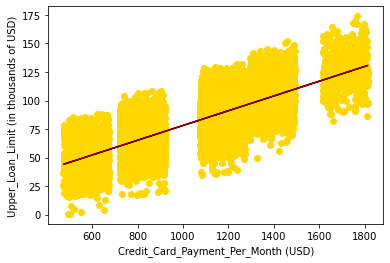

In [15]:
x1 = df['Credit_Card_Payment_Per_Month (USD)']
y = df['Upper_Loan_Limit (in thousands of USD)']
plt.figure(figsize = (6, 4))
plt.scatter(x1,y, color='gold')

plt.xlabel('Credit_Card_Payment_Per_Month (USD)')
plt.ylabel('Upper_Loan_Limit (in thousands of USD)')

m1, b1 = np.polyfit(x1, y, 1)
plt.plot(x1, m1*x1+b1, 'maroon')
print(m1,'slope,',b1,'intercept')

In [16]:
ccpay='Credit_Card_Payment_Per_Month (USD)'
loanlimit='Upper_Loan_Limit (in thousands of USD)'
scaler = MinMaxScaler()
df['Credit_Card_Payment_Per_Month (USD)_scaled'] = scaler.fit_transform(df[[ccpay]])
print(ccpay,':', scaler.data_min_,'min,',scaler.data_max_,'max')
df['Upper_Loan_Limit (in thousands of USD)_scaled'] = scaler.fit_transform(df[[loanlimit]]) 
print(loanlimit,':', scaler.data_min_,'min,', scaler.data_max_,'max')
df

Credit_Card_Payment_Per_Month (USD) : [473.75241725] min, [1814.26340553] max
Upper_Loan_Limit (in thousands of USD) : [0.53995619] min, [173.80581301] max


,No_of_Credit_Cards,Credit_Card_Payment_Per_Month (USD),Upper_Loan_Limit (in thousands of USD),Credit_Card_Payment_Per_Month (USD)_scaled,Upper_Loan_Limit (in thousands of USD)_scaled
0,4.0,1149.946696,92.548079,0.504430,0.531023
1,5.0,1350.901893,85.805414,0.654340,0.492108
2,4.0,1216.629370,78.187597,0.554174,0.448142
3,2.0,617.964971,47.129856,0.107580,0.268893
4,4.0,1202.738744,108.301048,0.543812,0.621941
...,...,...,...,...,...
11995,2.0,567.747412,64.775335,0.070119,0.370733
11996,2.0,547.878406,52.244325,0.055297,0.298411
11997,4.0,1178.751467,66.462858,0.525918,0.380473
11998,2.0,476.219855,43.638415,0.001841,0.248742


In [17]:
X = df.drop(['Credit_Card_Payment_Per_Month (USD)','Upper_Loan_Limit (in thousands of USD)', 'Upper_Loan_Limit (in thousands of USD)_scaled'] , axis=1)
y = df['Upper_Loan_Limit (in thousands of USD)_scaled']

print(X)
print(y)

       No_of_Credit_Cards  Credit_Card_Payment_Per_Month (USD)_scaled
0                     4.0                                    0.504430
1                     5.0                                    0.654340
2                     4.0                                    0.554174
3                     2.0                                    0.107580
4                     4.0                                    0.543812
...                   ...                                         ...
11995                 2.0                                    0.070119
11996                 2.0                                    0.055297
11997                 4.0                                    0.525918
11998                 2.0                                    0.001841
11999                 4.0                                    0.539929

[12000 rows x 2 columns]
0        0.531023
1        0.492108
2        0.448142
3        0.268893
4        0.621941
           ...   
11995    0.370733
11996   

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=603479)
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [19]:
predictions = model.predict(X_test)
print('Intercept:', model.intercept_)
print('Coefficients: ',model.coef_)
print('mean_squared_error (MSE): ', mean_squared_error(y_test, predictions))
print('mean_absolute_error (MAE): ', mean_absolute_error(y_test, predictions))

Intercept: 0.13651152838613784
Coefficients:  [0.06508629 0.20746799]
mean_squared_error (MSE):  0.007381988491060714
mean_absolute_error (MAE):  0.06716589655041497


In [20]:
pi = pd.read_excel('Professional_Information.xlsx', index_col = 0, parse_dates = True)
pi.head()

,Unnamed: 1,Profession
0,NaN,Working_Professional
1,NaN,Working_Professional
2,NaN,Working_Professional
3,NaN,Businessman
4,NaN,Working_Professional


In [21]:
pi = pi.drop('Unnamed: 1', axis=1)

In [22]:
pi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Profession  11990 non-null  object
dtypes: object(1)
memory usage: 187.5+ KB


In [23]:
pi.isna().sum()

Profession    10
dtype: int64

In [24]:
pi['Profession'].unique()

array(['Working_Professional', 'Businessman', 'Other_Occupations', nan,
       'Working_', 'Working_Prof.', 'Working_Profnl',
       'Working_Professionals', 'Working_PROFESSIONAL',
       'Working_ProfessionalS', 'Working_PROF', 'Working_PROFNL',
       'working professional', 'working_professional',
       'working_Professional', 'working Professional',
       'working  Profession', 'working Professi', 'Working_Pro',
       'Working  Professional', 'working  P rofessional',
       'Worki  ng_Profess    ional', 'Wo rking_Profe  ssional',
       'Worki  ng_Prof   essional', 'Wo  rking_Profes   sional',
       'Wor   king_Prof    essional', 'Work   ing_Profess     ional',
       'Wor    king_Profe      ssional', 'Work    ing_Profe    ssional',
       'Worki   ng_Profes   sional', 'Working_ProfessionalSS'],
      dtype=object)

In [25]:
#replace multiple values with only one value 'Working_Professional', we make a dictionary including all variations of 'Working_Professional'
pi.replace(dict.fromkeys([ 'Working_', 'Working_Prof.', 'Working_Profnl',
       'Working_Professionals', 'Working_PROFESSIONAL',
       'Working_ProfessionalS', 'Working_PROF', 'Working_PROFNL',
       'working professional', 'working_professional',
       'working_Professional', 'working Professional',
       'working  Profession', 'working Professi', 'Working_Pro',
       'Working  Professional', 'working  P rofessional',
       'Worki  ng_Profess    ional', 'Wo rking_Profe  ssional',
       'Worki  ng_Prof   essional', 'Wo  rking_Profes   sional',
       'Wor   king_Prof    essional', 'Work   ing_Profess     ional',
       'Wor    king_Profe      ssional', 'Work    ing_Profe    ssional',
       'Worki   ng_Profes   sional', 'Working_ProfessionalSS'], 'Working_Professional'), inplace=True)

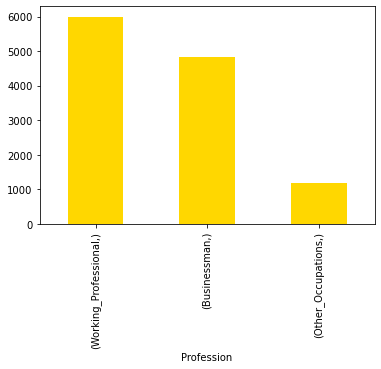

In [26]:
pi['Profession'].fillna(pi['Profession'].mode()[0], inplace=True)
pi.value_counts().plot(kind='bar', color='gold');

In [27]:
#make a copy of df
augdf1 = df.copy()

In [28]:
#add 'Profession' column to the copied version of df
augdf1['Profession'] = pi['Profession']
augdf1

,No_of_Credit_Cards,Credit_Card_Payment_Per_Month (USD),Upper_Loan_Limit (in thousands of USD),Credit_Card_Payment_Per_Month (USD)_scaled,Upper_Loan_Limit (in thousands of USD)_scaled,Profession
0,4.0,1149.946696,92.548079,0.504430,0.531023,Working_Professional
1,5.0,1350.901893,85.805414,0.654340,0.492108,Working_Professional
2,4.0,1216.629370,78.187597,0.554174,0.448142,Working_Professional
3,2.0,617.964971,47.129856,0.107580,0.268893,Businessman
4,4.0,1202.738744,108.301048,0.543812,0.621941,Working_Professional
...,...,...,...,...,...,...
11995,2.0,567.747412,64.775335,0.070119,0.370733,Working_Professional
11996,2.0,547.878406,52.244325,0.055297,0.298411,Working_Professional
11997,4.0,1178.751467,66.462858,0.525918,0.380473,Other_Occupations
11998,2.0,476.219855,43.638415,0.001841,0.248742,Businessman


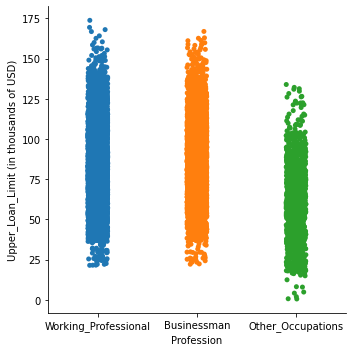

In [29]:
sns.catplot(data=augdf1, x="Profession", y="Upper_Loan_Limit (in thousands of USD)");

In [30]:
pro='Profession'
other=np.full((1), 'Other_Occupations')
ohe=OneHotEncoder(categories='auto', drop=other, sparse=False)
prof=pi[pro].array.reshape(-1,1)
prof1=pd.DataFrame(ohe.fit_transform(prof))
prof1

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
11995,0.0,1.0
11996,0.0,1.0
11997,0.0,0.0
11998,1.0,0.0


In [31]:
augdf1=pd.merge(augdf1, prof1, on=augdf1.index, how='left')
augdf1=augdf1.drop('key_0', axis=1)
augdf1=augdf1.rename({0:'Businessman?', 1:"Working Professional?"}, axis=1)
augdf1

,No_of_Credit_Cards,Credit_Card_Payment_Per_Month (USD),Upper_Loan_Limit (in thousands of USD),Credit_Card_Payment_Per_Month (USD)_scaled,Upper_Loan_Limit (in thousands of USD)_scaled,Profession,Businessman?,Working Professional?
0,4.0,1149.946696,92.548079,0.504430,0.531023,Working_Professional,0.0,1.0
1,5.0,1350.901893,85.805414,0.654340,0.492108,Working_Professional,0.0,1.0
2,4.0,1216.629370,78.187597,0.554174,0.448142,Working_Professional,0.0,1.0
3,2.0,617.964971,47.129856,0.107580,0.268893,Businessman,1.0,0.0
4,4.0,1202.738744,108.301048,0.543812,0.621941,Working_Professional,0.0,1.0
...,...,...,...,...,...,...,...,...
11995,2.0,567.747412,64.775335,0.070119,0.370733,Working_Professional,0.0,1.0
11996,2.0,547.878406,52.244325,0.055297,0.298411,Working_Professional,0.0,1.0
11997,4.0,1178.751467,66.462858,0.525918,0.380473,Other_Occupations,0.0,0.0
11998,2.0,476.219855,43.638415,0.001841,0.248742,Businessman,1.0,0.0


In [32]:
loanlscale='Upper_Loan_Limit (in thousands of USD)_scaled'
x2= augdf1.drop([pro, ccpay, loanlimit, loanlscale], axis=1)
y2=augdf1[loanlscale]
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.3, random_state= 603479)

In [33]:

model2 = LinearRegression()

model2.fit(x2_train, y2_train)

y2_pred = model2.predict(x2_test)
print('Intercept:', model2.intercept_)
print('Coefficients :', model2.coef_)
print('MSE =',mean_squared_error(y2_test, y2_pred))
print('MAE =',mean_absolute_error(y2_test, y2_pred))

Intercept: 0.018492845088553922
Coefficients : [0.06450817 0.20825765 0.13755598 0.12941389]
MSE = 0.005869914419459935
MAE = 0.06158971793846204


In [34]:
bi = pd.read_excel('Biographical_Information.xlsx', index_col = 0, parse_dates = True)
bi.head()

,Unnamed: 1,Age (Years)
0,NaN,60
1,NaN,25
2,NaN,30
3,NaN,25
4,NaN,55


In [35]:
bi = bi.drop('Unnamed: 1', axis=1)

In [36]:
bi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age (Years)  12000 non-null  object
dtypes: object(1)
memory usage: 187.5+ KB


In [37]:
bi.isna().sum()

Age (Years)    0
dtype: int64

In [38]:
bi['Age (Years)'].unique()

array([60, 25, 30, 55, 35, '25 years', 50, 75, 40, '60 yrs', 45, 70, 65,
       '70YEARS ', '45 years', 'YRS 45', '65 yers', '35yeers', '45YEEERS',
       '25yeers', '50YRS__', '35_YRS', '25_yrs', 'yrs.25', '25 YEARS OLD',
       '25yrs ', 'yrs 35', 'yeears 60', '25 years ', '35years ',
       '50YEARs', '50YEARS ', '60yrs ', '25years ', '50 YEARS ', '55yrs ',
       '25 yers', '30yr', '60yr,', '25yr..', '70yrs…', '75yrs', '40tyrs',
       'YEARS 40', 'YEARS 35', 'years 35', '45yrs ', '3YEAR0'],
      dtype=object)

In [39]:
bi['Age (Years)'].mode()

0    25
Name: Age (Years), dtype: object

In [40]:
age = 'Age (Years)' 
for a in bi.index:
    x=''
    for h in str(bi.loc[a,age]):
        if h.isnumeric():
            x+=h
    bi.loc[a,age]=x
bi[age]=bi[age].astype(int)

In [41]:
augdf2 = augdf1.copy()
augdf2['Age'] = bi['Age (Years)']
augdf2

,No_of_Credit_Cards,Credit_Card_Payment_Per_Month (USD),Upper_Loan_Limit (in thousands of USD),Credit_Card_Payment_Per_Month (USD)_scaled,Upper_Loan_Limit (in thousands of USD)_scaled,Profession,Businessman?,Working Professional?,Age
0,4.0,1149.946696,92.548079,0.504430,0.531023,Working_Professional,0.0,1.0,60
1,5.0,1350.901893,85.805414,0.654340,0.492108,Working_Professional,0.0,1.0,25
2,4.0,1216.629370,78.187597,0.554174,0.448142,Working_Professional,0.0,1.0,30
3,2.0,617.964971,47.129856,0.107580,0.268893,Businessman,1.0,0.0,25
4,4.0,1202.738744,108.301048,0.543812,0.621941,Working_Professional,0.0,1.0,55
...,...,...,...,...,...,...,...,...,...
11995,2.0,567.747412,64.775335,0.070119,0.370733,Working_Professional,0.0,1.0,60
11996,2.0,547.878406,52.244325,0.055297,0.298411,Working_Professional,0.0,1.0,40
11997,4.0,1178.751467,66.462858,0.525918,0.380473,Other_Occupations,0.0,0.0,35
11998,2.0,476.219855,43.638415,0.001841,0.248742,Businessman,1.0,0.0,25


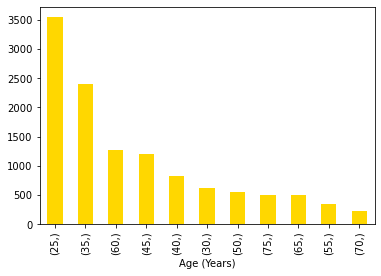

In [42]:
bi.value_counts().plot(kind='bar', color='gold');

In [43]:
scaler = MinMaxScaler()
augdf2[['Age_scaled']] = scaler.fit_transform(augdf2[['Age']]) 
print('Age:', scaler.data_min_, 'min,',scaler.data_max_, 'max')

Age: [25.] min, [75.] max


In [44]:
augdf2

,No_of_Credit_Cards,Credit_Card_Payment_Per_Month (USD),Upper_Loan_Limit (in thousands of USD),Credit_Card_Payment_Per_Month (USD)_scaled,Upper_Loan_Limit (in thousands of USD)_scaled,Profession,Businessman?,Working Professional?,Age,Age_scaled
0,4.0,1149.946696,92.548079,0.504430,0.531023,Working_Professional,0.0,1.0,60,0.7
1,5.0,1350.901893,85.805414,0.654340,0.492108,Working_Professional,0.0,1.0,25,0.0
2,4.0,1216.629370,78.187597,0.554174,0.448142,Working_Professional,0.0,1.0,30,0.1
3,2.0,617.964971,47.129856,0.107580,0.268893,Businessman,1.0,0.0,25,0.0
4,4.0,1202.738744,108.301048,0.543812,0.621941,Working_Professional,0.0,1.0,55,0.6
...,...,...,...,...,...,...,...,...,...,...
11995,2.0,567.747412,64.775335,0.070119,0.370733,Working_Professional,0.0,1.0,60,0.7
11996,2.0,547.878406,52.244325,0.055297,0.298411,Working_Professional,0.0,1.0,40,0.3
11997,4.0,1178.751467,66.462858,0.525918,0.380473,Other_Occupations,0.0,0.0,35,0.2
11998,2.0,476.219855,43.638415,0.001841,0.248742,Businessman,1.0,0.0,25,0.0


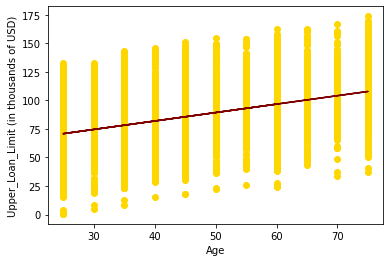

In [45]:
age_x = augdf2['Age']
ll_y = augdf2['Upper_Loan_Limit (in thousands of USD)']
plt.figure(figsize = (6, 4))
plt.scatter(age_x,ll_y, color='gold')

plt.xlabel('Age')
plt.ylabel('Upper_Loan_Limit (in thousands of USD)')

m2, b2 = np.polyfit(age_x, ll_y, 1)
plt.plot(age_x, m2*age_x+b2, 'maroon');

In [46]:
x3= augdf2.drop([pro, ccpay, loanlimit, loanlscale, 'Age'], axis=1)
y3=augdf2[loanlscale]
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.3, random_state= 603479)

In [47]:
model3 = LinearRegression()
model3.fit(x3_train, y3_train)

LinearRegression()

In [48]:
y3_pred = model3.predict(x3_test)
print('Intercept:', model3.intercept_)
print('Coefficients:', model3.coef_,)
print('MSE =',mean_squared_error(y3_test, y3_pred))
print('MAE =',mean_absolute_error(y3_test, y3_pred))

Intercept: -0.048242810602848796
Coefficients: [0.06616429 0.19758712 0.13615976 0.1293948  0.20980979]
MSE = 0.0018532880430741775
MAE = 0.033113077630736114


In [49]:
cr= pd.read_excel('Credit_Agency_Rating.xlsx', index_col=0)
cr

,Unnamed: 1,Rating
0,NaN,RN_1
1,NaN,RN_1
2,NaN,RN_1
3,NaN,RN_1
4,NaN,RN_2
...,...,...
11995,NaN,RN_2
11996,NaN,RN_2
11997,NaN,RN_1
11998,NaN,RN_1


In [50]:
cr.isna().sum()

Unnamed: 1    12000
Rating            2
dtype: int64

In [51]:
cr=cr.drop('Unnamed: 1', axis=1)
cr

,Rating
0,RN_1
1,RN_1
2,RN_1
3,RN_1
4,RN_2
...,...
11995,RN_2
11996,RN_2
11997,RN_1
11998,RN_1


In [52]:
cr['Rating'].unique()

array(['RN_1', 'RN_2', 'Other_Ratings', 'MISSING', '???', '??MISSING',
       'MISSING!!!', 'MISSING VALUE', 'UNKNOWN', 'UNKNOWN VALUE!!!',
       'MISSING???', 'UNKNOWN!!!', 'MiSSing valUE', 'MISSingsg val',
       'VALUE!!!', '!!!!VALUE!!!', '!!!Value!!!', '!!! VALUE!!!!',
       'vaLUE!!!', 'Value!!!', 'VAL???', 'VALUE????', '??VALUE???',
       '??? VALUE????', '?? VAL???', '??? VALUE ????', 'Val???', nan,
       'Requested info!!', 'NOT Available', 'NOT Reported!!!!',
       '??? NOT REPORTED???'], dtype=object)

In [53]:
error=['MISSING', '???', '??MISSING',
       'MISSING!!!', 'MISSING VALUE', 'UNKNOWN', 'UNKNOWN VALUE!!!',
       'MISSING???', 'UNKNOWN!!!', 'MiSSing valUE', 'MISSingsg val',
       'VALUE!!!', '!!!!VALUE!!!', '!!!Value!!!', '!!! VALUE!!!!',
       'vaLUE!!!', 'Value!!!', 'VAL???', 'VALUE????', '??VALUE???',
       '??? VALUE????', '?? VAL???', '??? VALUE ????', 'Val???', np.nan,
       'Requested info!!', 'NOT Available', 'NOT Reported!!!!',
       '??? NOT REPORTED???']

In [54]:
cr=cr.replace(error, np.nan)

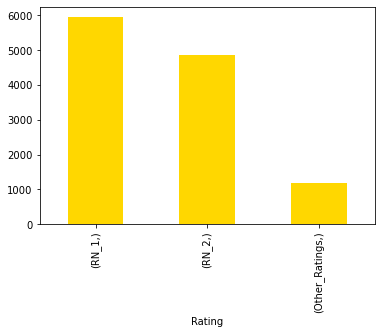

In [55]:
cr=cr.fillna(cr['Rating'].mode()[0])
cr.value_counts().plot(kind='bar',color='gold');

In [56]:
augdf3= pd.merge(augdf2, cr, on=augdf2.index, how='left')
augdf3= augdf3.drop('key_0', axis=1)
augdf3

,No_of_Credit_Cards,Credit_Card_Payment_Per_Month (USD),Upper_Loan_Limit (in thousands of USD),Credit_Card_Payment_Per_Month (USD)_scaled,Upper_Loan_Limit (in thousands of USD)_scaled,Profession,Businessman?,Working Professional?,Age,Age_scaled,Rating
0,4.0,1149.946696,92.548079,0.504430,0.531023,Working_Professional,0.0,1.0,60,0.7,RN_1
1,5.0,1350.901893,85.805414,0.654340,0.492108,Working_Professional,0.0,1.0,25,0.0,RN_1
2,4.0,1216.629370,78.187597,0.554174,0.448142,Working_Professional,0.0,1.0,30,0.1,RN_1
3,2.0,617.964971,47.129856,0.107580,0.268893,Businessman,1.0,0.0,25,0.0,RN_1
4,4.0,1202.738744,108.301048,0.543812,0.621941,Working_Professional,0.0,1.0,55,0.6,RN_2
...,...,...,...,...,...,...,...,...,...,...,...
11995,2.0,567.747412,64.775335,0.070119,0.370733,Working_Professional,0.0,1.0,60,0.7,RN_2
11996,2.0,547.878406,52.244325,0.055297,0.298411,Working_Professional,0.0,1.0,40,0.3,RN_2
11997,4.0,1178.751467,66.462858,0.525918,0.380473,Other_Occupations,0.0,0.0,35,0.2,RN_1
11998,2.0,476.219855,43.638415,0.001841,0.248742,Businessman,1.0,0.0,25,0.0,RN_1


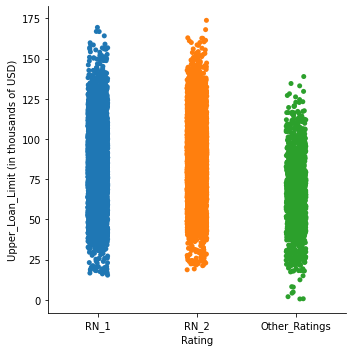

In [57]:
sns.catplot(data=augdf3, x="Rating", y="Upper_Loan_Limit (in thousands of USD)");

In [58]:
augdf3['Rating'].unique()

array(['RN_1', 'RN_2', 'Other_Ratings'], dtype=object)

In [59]:
other1=np.full((1), 'Other_Ratings')
ohe=OneHotEncoder(categories='auto',drop=other1,sparse=False)
rating=augdf3['Rating'].array.reshape(-1,1)
rate=pd.DataFrame(ohe.fit_transform(rating))
rate

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
11995,0.0,1.0
11996,0.0,1.0
11997,1.0,0.0
11998,1.0,0.0


In [60]:
rate=rate.rename({0: 'RN_1?', 1:'RN_2?'}, axis=1)
rate

,RN_1?,RN_2?
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
11995,0.0,1.0
11996,0.0,1.0
11997,1.0,0.0
11998,1.0,0.0


In [61]:
augdf3=augdf3.merge(rate, on=augdf3.index, how='left')
augdf3=augdf3.drop('key_0', axis=1)
augdf3

,No_of_Credit_Cards,Credit_Card_Payment_Per_Month (USD),Upper_Loan_Limit (in thousands of USD),Credit_Card_Payment_Per_Month (USD)_scaled,Upper_Loan_Limit (in thousands of USD)_scaled,Profession,Businessman?,Working Professional?,Age,Age_scaled,Rating,RN_1?,RN_2?
0,4.0,1149.946696,92.548079,0.504430,0.531023,Working_Professional,0.0,1.0,60,0.7,RN_1,1.0,0.0
1,5.0,1350.901893,85.805414,0.654340,0.492108,Working_Professional,0.0,1.0,25,0.0,RN_1,1.0,0.0
2,4.0,1216.629370,78.187597,0.554174,0.448142,Working_Professional,0.0,1.0,30,0.1,RN_1,1.0,0.0
3,2.0,617.964971,47.129856,0.107580,0.268893,Businessman,1.0,0.0,25,0.0,RN_1,1.0,0.0
4,4.0,1202.738744,108.301048,0.543812,0.621941,Working_Professional,0.0,1.0,55,0.6,RN_2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,2.0,567.747412,64.775335,0.070119,0.370733,Working_Professional,0.0,1.0,60,0.7,RN_2,0.0,1.0
11996,2.0,547.878406,52.244325,0.055297,0.298411,Working_Professional,0.0,1.0,40,0.3,RN_2,0.0,1.0
11997,4.0,1178.751467,66.462858,0.525918,0.380473,Other_Occupations,0.0,0.0,35,0.2,RN_1,1.0,0.0
11998,2.0,476.219855,43.638415,0.001841,0.248742,Businessman,1.0,0.0,25,0.0,RN_1,1.0,0.0


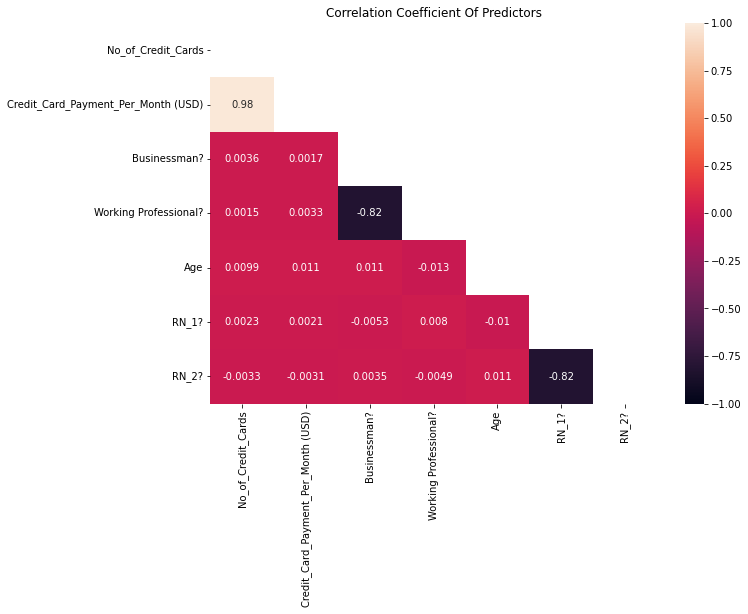

In [62]:
augdf3_plot=augdf3.drop(['Upper_Loan_Limit (in thousands of USD)','Credit_Card_Payment_Per_Month (USD)_scaled','Upper_Loan_Limit (in thousands of USD)_scaled','Age_scaled'], axis=1)

plt.figure(figsize=(10,7))

mask = np.triu(np.ones_like(augdf3_plot.corr(), dtype=bool))

sns.heatmap(augdf3_plot.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [63]:
augdf3.describe()

,No_of_Credit_Cards,Credit_Card_Payment_Per_Month (USD),Upper_Loan_Limit (in thousands of USD),Credit_Card_Payment_Per_Month (USD)_scaled,Upper_Loan_Limit (in thousands of USD)_scaled,Businessman?,Working Professional?,Age,Age_scaled,RN_1?,RN_2?
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000
mean,3.751333,1067.227482,82.464790,0.442723,0.472827,0.402583,0.49925,40.639167,0.312783,0.496083,0.405667
std,1.094424,318.281798,25.575555,0.237433,0.147609,0.490439,0.50002,15.051506,0.301030,0.500005,0.491041
min,2.000000,473.752417,0.539956,0.000000,0.000000,0.000000,0.00000,25.000000,0.000000,0.000000,0.000000
25%,3.000000,796.610759,63.382277,0.240847,0.362693,0.000000,0.00000,25.000000,0.000000,0.000000,0.000000
50%,4.000000,1134.227320,82.838896,0.492704,0.474986,0.000000,0.00000,35.000000,0.200000,0.000000,0.000000
75%,5.000000,1296.772636,99.922154,0.613960,0.573582,1.000000,1.00000,50.000000,0.500000,1.000000,1.000000
max,6.000000,1814.263406,173.805813,1.000000,1.000000,1.000000,1.00000,75.000000,1.000000,1.000000,1.000000


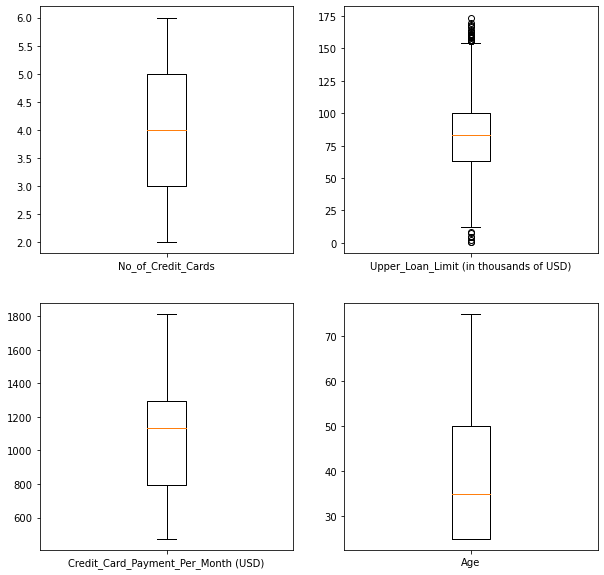

In [64]:
nofcc='No_of_Credit_Cards'
fig, axs = plt.subplots(2,2, figsize=(10, 10))

axs[0, 0].boxplot(augdf3[nofcc]);
axs[0, 0].set_xticks([1], [nofcc]);

axs[1, 0].boxplot(augdf3[ccpay]);
axs[1, 0].set_xticks([1], [ccpay]);

axs[0, 1].boxplot(augdf3[loanlimit]);
axs[0, 1].set_xticks([1], [loanlimit]);

axs[1, 1].boxplot(augdf3['Age']);
axs[1, 1].set_xticks([1], ['Age']);

In [65]:
x4=augdf3.drop([ccpay, loanlimit, loanlscale, pro, 'Age', 'Rating'], axis=1)
y4=augdf3[loanlscale]
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size = 0.3, random_state= 603479)

In [66]:
model4 = LinearRegression()
model4.fit(x4_train, y4_train)

LinearRegression()

In [67]:
y4_pred = model4.predict(x4_test)
print('Intercept:', model4.intercept_)
print('Coefficients:', model4.coef_,)
print('MSE =',mean_squared_error(y4_test, y4_pred))
print('MAE =',mean_absolute_error(y4_test, y4_pred))

Intercept: -0.1398378584579027
Coefficients: [0.06525312 0.20289717 0.13557406 0.12923478 0.20878529 0.09379275
 0.11603866]
MSE = 0.0008276000174591289
MAE = 0.023817517777583064


In [68]:
print(x4)
print(y4)

       No_of_Credit_Cards  Credit_Card_Payment_Per_Month (USD)_scaled  \
0                     4.0                                    0.504430   
1                     5.0                                    0.654340   
2                     4.0                                    0.554174   
3                     2.0                                    0.107580   
4                     4.0                                    0.543812   
...                   ...                                         ...   
11995                 2.0                                    0.070119   
11996                 2.0                                    0.055297   
11997                 4.0                                    0.525918   
11998                 2.0                                    0.001841   
11999                 4.0                                    0.539929   

       Businessman?  Working Professional?  Age_scaled  RN_1?  RN_2?  
0               0.0                    1.0         0

In [69]:
pd.DataFrame(zip(x4.columns, model4.coef_))

,0,1
0,No_of_Credit_Cards,0.065253
1,Credit_Card_Payment_Per_Month (USD)_scaled,0.202897
2,Businessman?,0.135574
3,Working Professional?,0.129235
4,Age_scaled,0.208785
5,RN_1?,0.093793
6,RN_2?,0.116039


In [70]:
model4.coef_

array([0.06525312, 0.20289717, 0.13557406, 0.12923478, 0.20878529,
       0.09379275, 0.11603866])

In [71]:
x4

,No_of_Credit_Cards,Credit_Card_Payment_Per_Month (USD)_scaled,Businessman?,Working Professional?,Age_scaled,RN_1?,RN_2?
0,4.0,0.504430,0.0,1.0,0.7,1.0,0.0
1,5.0,0.654340,0.0,1.0,0.0,1.0,0.0
2,4.0,0.554174,0.0,1.0,0.1,1.0,0.0
3,2.0,0.107580,1.0,0.0,0.0,1.0,0.0
4,4.0,0.543812,0.0,1.0,0.6,0.0,1.0
...,...,...,...,...,...,...,...
11995,2.0,0.070119,0.0,1.0,0.7,0.0,1.0
11996,2.0,0.055297,0.0,1.0,0.3,0.0,1.0
11997,4.0,0.525918,0.0,0.0,0.2,1.0,0.0
11998,2.0,0.001841,1.0,0.0,0.0,1.0,0.0


In [72]:
k,m=0,0
o,p=0,0
l,t=0,0
h,i=0,0

for n in augdf3[ccpay].index:
    if augdf3.loc[n,ccpay] > (augdf3[ccpay].mean()+(2.5*augdf3[ccpay].std())):
        m=m+1
    if augdf3.loc[n,ccpay] < (augdf3[ccpay].mean()-(2.5*augdf3[ccpay].std())):
        k=k+1
for n in augdf3[loanlimit].index:
    if augdf3.loc[n,loanlimit] > (augdf3[loanlimit].mean()+(2.5*augdf3[loanlimit].std())):
        o=o+1
    if augdf3.loc[n,loanlimit] < (augdf3[loanlimit].mean()-(2.5*augdf3[loanlimit].std())):
        p=p+1
for n in augdf3[nofcc].index:
    if df.loc[n,nofcc] > (augdf3[nofcc].mean()+(2.5*augdf3[nofcc].std())):
        l=l+1
    if augdf3.loc[n,nofcc] < (augdf3[nofcc].mean()-(2.5*augdf3[nofcc].std())):
        t=t+1
for n in augdf3['Age'].index:
    if augdf3.loc[n,'Age'] > (augdf3['Age'].mean()+(2.5*augdf3['Age'].std())):
        h=h+1
    if augdf3.loc[n,'Age'] < (augdf3['Age'].mean()-(2.5*augdf3['Age'].std())):
        i=i+1        

print(m, k, ccpay)
print(o,p, loanlimit)
print(l,t, nofcc)
print(h,i, 'Age')

0 0 Credit_Card_Payment_Per_Month (USD)
78 28 Upper_Loan_Limit (in thousands of USD)
0 0 No_of_Credit_Cards
0 0 Age


In [73]:
outliers=[]
for n in augdf3[loanlimit].index:
    if augdf3.loc[n,loanlimit] > (augdf3[loanlimit].mean()+(2.5*augdf3[loanlimit].std())):
        
        outliers.append(n)
    if augdf3.loc[n,loanlimit] < (augdf3[loanlimit].mean()-(2.5*augdf3[loanlimit].std())):
        
        outliers.append(n)
newdf=augdf3.drop(outliers)

In [74]:
scaler=MinMaxScaler()

newdf[loanlscale]=scaler.fit_transform(newdf[loanlimit].array.reshape(-1,1))
newdf['Credit_Card_Payment_Per_Month (USD)_scaled']= scaler.fit_transform(newdf[ccpay].array.reshape(-1,1))
newdf['Age_scaled']=scaler.fit_transform(newdf['Age'].array.reshape(-1,1))
x5=newdf.drop([ccpay, loanlimit, loanlscale, pro, 'Age', 'Rating'], axis=1)
y5=newdf[loanlscale]
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size = 0.3, random_state= 603479)

In [75]:
model5 = LinearRegression()
model5.fit(x5_train, y5_train)

LinearRegression()

In [76]:
y5_pred = model5.predict(x5_test)
print('Intercept:', model5.intercept_)
print('Coefficients:', model5.coef_,)
print('MSE =',mean_squared_error(y5_test, y5_pred))
print('MAE =',mean_absolute_error(y5_test, y5_pred))

Intercept: -0.3307978364215847
Coefficients: [0.08843511 0.27337908 0.18528065 0.1768374  0.28242345 0.12657296
 0.15740967]
MSE = 0.0015134910834326196
MAE = 0.03224257335971503


In [77]:
def predict_loan_limit(augdf3):
    nocc = float(input('How many credit cards do you have? '))
    ccpay = float(input('What is your credit card payment per month? '))
    b = int(input('Are you a business man? (yes 1, no 0) '))
    wp = int(input('Are you a working professional? (yes 1, no 0) '))
    age = int(input('How old are you? '))
    rn1 = int(input('Do you have a 1 rating? (yes 1, no 0) '))
    rn2 = int(input('Do you have a 2 rating? (yes 1, no 0) '))

    scaler = MinMaxScaler()
    features_scaled = scaler.fit_transform(augdf3[['Credit_Card_Payment_Per_Month (USD)', 'Age']])

    ccpay_scaled = scaler.fit_transform(augdf3['Credit_Card_Payment_Per_Month (USD)'].values.reshape(-1, 1))
    new_ccpay = scaler.transform(np.array(ccpay).reshape(-1,1))
    age_scaled = scaler.fit_transform(augdf3['Age'].values.reshape(-1, 1))
    new_age = scaler.transform(np.array(age).reshape(-1,1))
    print(new_ccpay)
    print(new_age)
    
    coefs = model4.coef_
    loan_limit = coefs[0]*nocc + coefs[1]*new_ccpay + coefs[2]*b + coefs[3]*wp + coefs[4]*new_age + coefs[5]*rn1 + coefs[6]*rn2

    return loan_limit

loan = float(input('Loan amount requested? (thousands USD) '))

scaler = MinMaxScaler()
loan_scaled = scaler.fit_transform(augdf3['Upper_Loan_Limit (in thousands of USD)'].values.reshape(-1, 1))

new_loan = scaler.transform(np.array(loan).reshape(-1, 1))
print('Scaled loan requested: ', new_loan)

loan_limit = predict_loan_limit(augdf3)
print('Loan Limit: ',  loan_limit)
if loan_limit >= new_loan[0, 0]:
    print('Congratulations! You are approved')
else:
    print('Sorry. You are not approved.')


Loan amount requested? (thousands USD) 90
Scaled loan requested:  [[0.51631663]]
How many credit cards do you have? 1
What is your credit card payment per month? 100
Are you a business man? (yes 1, no 0) 1
Are you a working professional? (yes 1, no 0) 0
How old are you? 22
Do you have a 1 rating? (yes 1, no 0) 1
Do you have a 2 rating? (yes 1, no 0) 0
[[-0.27881339]]
[[-0.06]]
Loan Limit:  [[0.22552237]]
Sorry. You are not approved.
